In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import dynascale as ds

import matplotlib.pyplot as plt
import pandas as pd

In [48]:
task = ds.Task(
    N=[10],
    L=[2],
    E=[3],
    T=[5],
    factory_cls=ds.lds.LDSChallenge,
    supepochs=2,
    test_size=1,
    trials=3,
)

In [51]:
scores1 = task.evaluate(ds.baselines.NaiveLinearRegression)
scores1

  0%|          | 0/3 [00:00<?, ?it/s]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

In [40]:
scores2 = task.evaluate(ds.baselines.Koopman)
scores2

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 0s 145ms/step - loss: 30824016.0000 - reconstruction_loss: 2255.1958 - state_prediction_loss: 1002262912.0000 - linear_dynamics_loss: 20801362.0000 - infinity_norm: 449.2604


,n,latent_dim,embed_dim,timesteps,error
0,10,2,4,5,9.330843e+11
1,10,3,4,5,7.851484e+02
2,10,2,4,5,3.148456e+02
3,10,3,4,5,9.368499e+03
4,10,2,4,5,3.061864e+02
5,10,3,4,5,1.555002e+08


In [26]:
# scores3 = task.evaluate(ds.baselines.TommyLinearRegression, trials=3)
# scores3

AttributeError: module 'dynascale.baselines' has no attribute 'TommyLinearRegression'

In [29]:
ds.baselines

<module 'dynascale.baselines' from '/Users/logan/PycharmProjects/DynaScale/dynascale/baselines/__init__.py'>

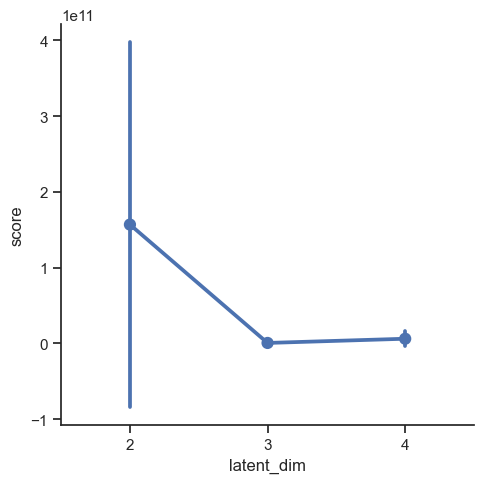

In [17]:
ds.utils.plotting.plotMetric(scores1, "latent_dim", "score")

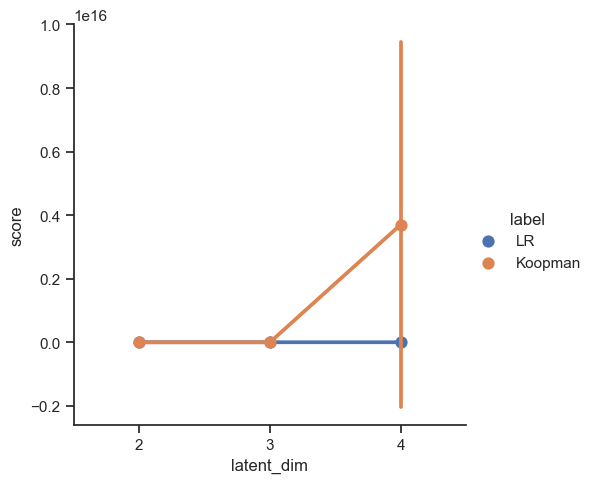

In [22]:
scores1["label"] = "LR"
scores2["label"] = "Koopman"
df = pd.concat([scores1, scores2])
ds.utils.plotting.plotMetric(df, "latent_dim", "score", "label")